In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,0.00149,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,0.00166,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [69]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = df.drop(columns = 'class').values
y = df['class']
# knn works so much better with scaler
X = StandardScaler().fit_transform(X)

In [70]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

classifiers = [
    ("kNN", KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')),
    ("Naive Bayes", GaussianNB())
]

In [75]:
for name, classifier in classifiers:
    accs = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
    print(name, "accuracy =", round(np.mean(accs),2), "±", round(np.std(accs),2))

# 6)
# Assim verifica se que o Knn accuracy é superior ao do naive bayes accuracy

#7) reasons for difference in predictive accuracy
# 1- dependencia entre features que o naive bayes ignora
# 2- decision boundary ideal é demasiado complexo para o naive bayes (naive bayes decision boundary só pode ser linear, eliptica ou parabolica)
# 3- há independencia condicional, naive bayes pode sofrer quando a probabilidade condicional de um certo atributo for igual a zero


kNN accuracy = 0.81 ± 0.06
Naive Bayes accuracy = 0.76 ± 0.05


'\n1- dependencia entre features que o naive bayes ignora\n2- decision boundary é demasiado complexo para o naive bayes\n3-\n'

In [72]:
def sum_of_conf_matrices(confusion_folds):
    res = np.array([0,0,0,0])
    for i in confusion_folds:
        for j in range(4):
            res[j] += i[j]

    '''n = len(confusion_folds)
    for i in range(4):
        res[i] /= n'''

    return res.reshape(2, 2)


accuracy: 0.81


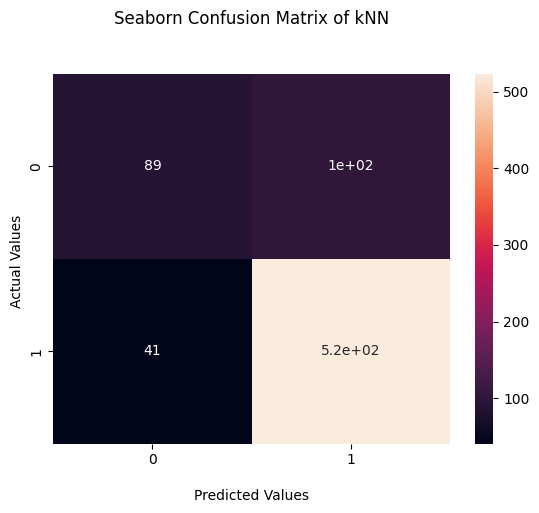

accuracy: 0.759


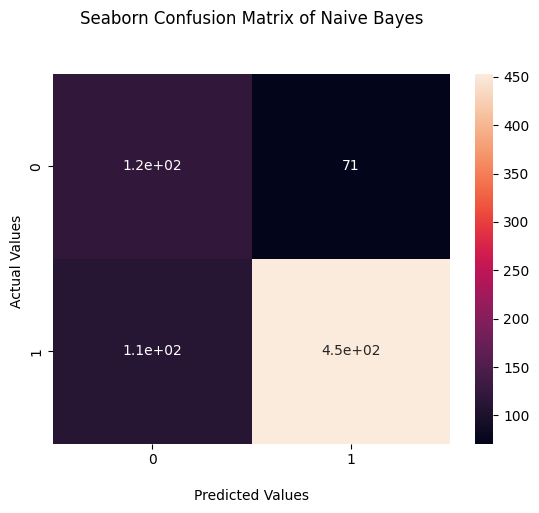

In [73]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
# b) manual fold iteration

for name, classifier in classifiers:
    confusion_folds = []
    folds = StratifiedKFold(n_splits=10)
    predictor = classifier

    # iterate per fold
    for train_k, test_k in folds.split(X, y):
        X_train, X_test = X[train_k], X[test_k]
        y_train, y_test = y[train_k], y[test_k]
        
        # train and assess
        predictor.fit(X_train, y_train)
        y_pred = predictor.predict(X_test)
        #acc_folds.append(round(metrics.accuracy_score(y_test, y_pred),2))
        M = confusion_matrix(y_test, y_pred)
        #print(M.reshape(1, 4)[0])
        confusion_folds.append(M.reshape(1, 4)[0])
        #plot_confusion_matrix(predictor, X_train, y_train)
        #ax = sns.heatmap(M, annot=True, cmap='Blues')
        #plt.show()

    M_avg = sum_of_conf_matrices(confusion_folds)
    #print(M_avg)
    print(f'accuracy: {round((M_avg[0,0]+M_avg[1,1])/np.sum(M_avg), 3)}')
    ax = sns.heatmap(M_avg, annot=True)

    ax.set_title(f'Seaborn Confusion Matrix of {name}\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()
